<a href="https://colab.research.google.com/github/fzry18/datmin-tugas1/blob/main/aprioriti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Forcasting (peramalan)**

Peramalan mengacu pada proses menganalisis dan menjelaskan keadaan masa depan mengenai setiap operasi yang dilakukan. Proses ini mempertimbangkan masa lalu dan informasi saat ini dalam upaya untuk memprediksi fakta untuk peristiwa masa depan. Singkatnya, peramalan mengacu pada proses melihat ke depan, dan menentukan tren masa depan dan dampaknya terhadap organisasi.

# **2. Regresi (Regression)**

 Metode yang satu ini sedikit mirip dengan klasifikasi data mining. Bedanya, regresi merupakan metode yang bertujuan untuk mencari pola nilai numerik, bukan kelas. Hasil dari metode regression adalah sebuah fungsi sebagai penentu hasil yang didasarkan nilai dari input.

# **3. Kluster (Clustering)**

mengidentifikasi pengelompokkan hal-hal berdasarkan karakter-karakter yang sudah diketahui, seperti mengelompokkan pelanggan dalam segment-segment yang berbeda berdasarkan demographis dan perilaku pembelian di masa lalu.

# **4. Klasifikasi (Clasification)**

Klasifikasi juga bisa diartikan sebagai proses mengategorisasikan suatu hal menjadi beberapa kelompok berdasarkan persamaan dan perbedaannya. Contohnya klasifikasi sampah berdasarkan jenis bahannya terbagi menjadi sampah organik dan sampah anorganik.

# **1. Data Mining - Analisis Asosiasi (Association)**

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.


Ruang Lingkup : **Product Purchases** <br>
**Algoritma apriori** : Digunakan agar komputer dapat mempelajari aturan asosiasi, mencari pola hubungan antar satu atau lebih item dalam suatu dataset. <br>
**Permasalahan** yang ingin di selesaikan adalah membantu pihak retail dalam menentukan product bundling dan product placement dari data transaksi yang hendak digunakan. 

## Tahapan data mining

1. **Data Selection** -> Pemilihan (seleksi) data dari sekumpulan data operasional perlu dilakukan sebelum tahap penggalian informasi. Data hasil seleksi yang digunakan untuk proses data mining, disimpan dalam suatu berkas, terpisah dari basis data operasional. <br>
2. **Data Pre-processing** -> Merupakan proses mengubah data mentah atau biasa dikenal dengan raw data yang dikumpulkan dari berbagai sumber menjadi informasi yang lebih bersih dan bisa digunakan untuk pengolahan selanjutnya.
> *2.1 Data Cleansing* -> Data cleaning mencakup proses membuang duplikasi data, memeriksa data yang inkonsisten, dan memperbaiki kesalahan yang ada pada data.<br> *2.2 Data Transformation* -> Merupakan proses transformasi pada data yang telah dipilih. Lebih lanjut dari itu, proses transformasi data merupakan proses mengubah data kedalam format operasional tertentu, mengkonversi tipe data, melakukan beberapa perhitungan, penyaringan data yang tidak relevan, dan meringkasnya (tergantung pada jenis atau pola informasi yang akan dicari dalam basis data). <br>
3. **Data mining** -> Data mining adalah proses mencari pola atau informasi menarik dalam data terpilih dengan menggunakan teknik atau metode tertentu. Teknik, metode, atau algoritma dalam data mining sangat bervariasi. Pemilihan metode atau algoritma yang tepat sangat bergantung pada tujuan dan proses data mining secara keseluruhan. <br>
4. **Interpretation / evalution** -> Pola informasi yang dihasilkan dari proses data mining perlu ditampilkan dalam bentuk yang mudah dimengerti oleh pihak yang berkepentingan. Tahap ini mencakup pemeriksaan apakah pola atau informasi yang ditemukan bertentangan dengan fakta atau hipotesis yang ada sebelumnya.

## Question

Mengidentifikasi produk-produk yang sering dibeli secara bersamaan oleh customer kemudian membantu pihak retail dalam menentukan product bundling dan product placement dari data transaksi yang digunakan. (Market Basket Analitcs) <br>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [ ]:
# Import dataset
df = pd.read_csv('data_retail2.csv')

<ipython-input-17-528b05da0978>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_retail2.csv')


In [ ]:
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,12/1/2020 8:26,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
1,536365,12/1/2020 8:26,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
2,536365,12/1/2020 8:26,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32.0,Toko Kelontong,190105.0,PT. KTRI DISTRIBUSI
3,536365,12/1/2020 8:26,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
4,536365,12/1/2020 8:26,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42.0,Mini Market,190105.0,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110836,545698,3/6/2021 14:44,29,KEDIRI,B2760,8992830161759,22293,BOX SGUNA HW 6175,ALAT RUMAH TANGGA,1,...,15572.0,NU MART,BARAT BALAI DS.SUMBER BENING BALEREJO MADIUN,MADIUN,JAWA TIMUR,INDONESIA,32.0,Toko Kelontong,390113.0,PT. MANOHARA JAYA
110837,545698,3/6/2021 14:44,29,KEDIRI,B2300,8998889050020,21592,BOX SW NGT 05-2 SEGI (A.C),ALAT RUMAH TANGGA,1,...,15572.0,HERI,PSR MAOSPATI BARAT - LUAR,MAGETAN,JAWA TIMUR,INDONESIA,32.0,Toko Kelontong,390113.0,PT. MANOHARA JAYA
110838,545698,3/6/2021 14:44,29,KEDIRI,B2135,8998889080010,21389,BOX SW NGT 08-1 SEGI (A.C),ALAT RUMAH TANGGA,4,...,15572.0,APOTEK CITRA BUANA / BINTI,JATILENGGER RT 04 RW 03,BLITAR,JAWA TIMUR,INDONESIA,14.0,Apotik I,390111.0,CV. PARARAMPA
110839,545698,3/6/2021 14:44,29,KEDIRI,B2483,8998889080034,22556,BOX SW NGT 08-3 SEGI (A.C),ALAT RUMAH TANGGA,1,...,15572.0,"DOSEN / SUNARTI A.0,5",BESUKI,TULUNGAGUNG,JAWA TIMUR,INDONESIA,32.0,Toko Kelontong,390111.0,CV. PARARAMPA


In [ ]:
df.dtypes

InvoiceNo               object
InvoiceDate             object
BRANCH_SPLR              int64
BRANCHNAME_SPLR         object
warehouseProductsID     object
BARCODEID                int64
StockCode               object
PRODUCT                 object
PRODUCT_CATEGORY        object
Quantity                 int64
UnitPrice              float64
UnitPriceRupiah          int64
oldCUSTID               object
CustomerID             float64
CUSTNAME                object
ADDRESS                 object
KOTA                    object
PROVINSI                object
NEGARA                  object
CHANNELID_SPLR         float64
CHANNELNAME_SPLR        object
SUBDISTID              float64
SUBDIST_NAME            object
dtype: object

In [ ]:
df.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,110841.000000,1.108410e+05,110841.000000,110841.000000,1.108410e+05,73716.000000,110840.000000,110840.000000
mean,24.644373,8.142773e+12,8.889400,5.255966,7.516031e+04,15332.585721,36.434888,243764.059004
std,13.180877,5.922967e+12,319.801821,114.901073,1.643085e+06,1760.362260,10.356150,130314.341198
min,1.000000,1.000000e+00,-74215.000000,0.000000,0.000000e+00,12346.000000,14.000000,10209.000000
25%,11.000000,8.888021e+12,1.000000,1.250000,1.787500e+04,13870.000000,32.000000,110123.000000
50%,28.000000,8.992916e+12,3.000000,2.460000,3.517800e+04,15296.000000,32.000000,270109.000000
75%,36.000000,8.998103e+12,9.000000,4.240000,6.063200e+04,16951.000000,41.000000,340306.000000
max,45.000000,8.999999e+14,74215.000000,16888.020000,2.414987e+08,18283.000000,93.000000,450202.000000


In [ ]:
pd.unique(df.BRANCHNAME_SPLR)

array(['SAMARINDA', 'YOGYAKARTA', 'BANDUNG', 'BANJARMASIN', 'TANGERANG',
       'KEDIRI', 'SEMARANG', 'BALIKPAPAN', 'CIREBON', 'PANGKALPINANG',
       'PURWOKERTO', 'MEDAN', 'MAKASSAR', 'DENPASAR', 'MALANG', 'JEMBER',
       'MANADO', 'SURABAYA 2', 'JAMBI', 'KUDUS', 'TEGAL',
       'BANDAR LAMPUNG', 'BOGOR', 'MATARAM', 'SOLO', 'TASIKMALAYA',
       'PALEMBANG', 'BATAM', 'SUKABUMI', 'PADANG', 'PEKANBARU',
       'SURABAYA 1', 'PONTIANAK', 'PALU'], dtype=object)

In [ ]:
df.nunique()


InvoiceNo               5199
InvoiceDate             4705
BRANCH_SPLR               34
BRANCHNAME_SPLR           34
warehouseProductsID    32193
BARCODEID              32181
StockCode               3195
PRODUCT                32104
PRODUCT_CATEGORY          53
Quantity                 310
UnitPrice                604
UnitPriceRupiah          604
oldCUSTID              53254
CustomerID              1832
CUSTNAME               33210
ADDRESS                29808
KOTA                     440
PROVINSI                  35
NEGARA                     1
CHANNELID_SPLR            42
CHANNELNAME_SPLR          42
SUBDISTID                 58
SUBDIST_NAME              54
dtype: int64

## 2. Data Pre-processing


### 2.1 Data Cleansing

In [ ]:
df.head(3)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,12/1/2020 8:26,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
1,536365,12/1/2020 8:26,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
2,536365,12/1/2020 8:26,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32.0,Toko Kelontong,190105.0,PT. KTRI DISTRIBUSI


In [ ]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Clean up spaces in product description, product category and remove any rows that don't have a valid invoice
df['PRODUCT'] = df['PRODUCT'].str.strip()
df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.strip()

df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [ ]:
# menghapus variabel inoviceNO yang diawali dengan huruf C pada invoice numbernya
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~(df['InvoiceNo'].str[0] == 'C')]

### 2.2 Data Transformation

In [ ]:
basket = (df[df['BRANCHNAME_SPLR'] =="PEKANBARU"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
basket.head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536592,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
536796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536799,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Show a subset of columns
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT
InvoiceNo,,,,,,,,
536592,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
536796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536799,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SABUN & SAMPHOO,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536592,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
536796,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
536797,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
536798,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
536799,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


## 3. Data Mining
### Data mining dapat dikenal juga dengan istilah data exploration

In [ ]:
# Build up the frequent items, the rules, and model

frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.169492,(ALAT RUMAH TANGGA)
1,0.194915,(BISKUIT)
2,0.144068,(DETERGEN)
3,0.224576,(KOSMETIK)
4,0.203390,(MINUMAN)
5,0.127119,(OBATAN)
6,0.110169,(PARFUM)
7,0.250000,(SABUN & SAMPHOO)
8,0.122881,(SNACK)
9,0.131356,(STATIONERY)


Dimana perintah yang di gunakan adalah apriori, dengan data dari basket_sets dengan minimum nilai support 0.1/ 10%.

In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head() # 1280 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.8)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head(20) # 64 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.8 (lebih dari sama dengan 80%)

Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support

In [ ]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
result2 = rules2[ (rules2['lift'] >= 1) & 
                (rules2['confidence'] >= 0.8) ]

best_result = result2.sort_values(by='confidence', ascending=False)
best_result.head() # 17 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction



If Antecedent Then Concequent

## 4. Interpretation

Produk-produk yang dibeli secara bersamaan oleh customer di daerah **JAWA TENGAH** terhadap rule asosiasi pada dataset dengan min_support 0.1 / 10%, min_threshold = 1, dan nilai lift sebesar lebih dari samadengan 1 serta tingkat confidence minimal yang diperhitungkan sebesar 0.8 (80%) adalah: 
- **sabun, shampoo, obat-obatan, parfum** dengan **kosmetik**.
- **kosmetik, susu, obat-obatan** dengan **minuman**.
- **kosmetik, alat rumah tangga, minuman** dengan **sabun dan samphoo**.
<br>
<br>

**Additional Note:**
Produk atau barang yang menjadi kombinasi produk pertama untuk frekuensi yang paling banyak adalah **kosmetik, minuman, sabun dan sampho**.

In [ ]:
# check barang kedua untuk kombinasi barang pertama
# pairing kombinasi dari pembelian produk pertama yang paling banyak untuk barang kedua adalah

apr_result['consequents'].value_counts()

Series([], Name: consequents, dtype: int64)

# **2. Customer Life Time Value**

In [ ]:
# Import dataset
df = pd.read_csv('data_retail2.csv')
df.head()

<ipython-input-36-829ef05c1ebc>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_retail2.csv')


,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,12/1/2020 8:26,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
1,536365,12/1/2020 8:26,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
2,536365,12/1/2020 8:26,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32.0,Toko Kelontong,190105.0,PT. KTRI DISTRIBUSI
3,536365,12/1/2020 8:26,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32.0,Toko Kelontong,130113.0,CV. EKA PUTRA
4,536365,12/1/2020 8:26,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42.0,Mini Market,190105.0,PT. KTRI DISTRIBUSI


In [ ]:
product_df = df.value_counts()
product_df = pd.DataFrame(product_df)
product_df

0
InvoiceNo InvoiceDate      BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                            PRODUCT_CATEGORY Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                ADDRESS                                            KOTA            PROVINSI         NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR   SUBDISTID SUBDIST_NAME                 
536365    12/1/2020 8:26   13          SAMARINDA       10001               8992753282401 85123A    123 BENDERA COKLAT 300G            SUSU              6       2.55      36465           3012815   17850.0    DUA PUTRI SLAMET RIYADI JL. SLAMET RIYADI                                  SAMARINDA       KALIMANTAN TIMUR INDONESIA 32.0           Toko Kelontong     130113.0  CV. EKA PUTRA               1
542902    2/1/2021 14:43   36          PURWOKERTO      R1851               4902430429405 22773     REJOICE SHP RICH 70ML              SABUN & SAMPHOO   24      1.25      17875           3212474   16011.0    JADI BARU, SPM JDB0194P JL. LINGKAR BUMIAYU                                BREBES          JAWA TENGAH      INDONESIA 41.0           Super Market       320302.0  CV. CITRA BERUSAHA          1
542900    2/1/2021 14:24   6           SEMARANG        R1861               4902430429368 22846     REJOICE ANTI FRIZZ 170ML           MINUMAN           1       16.95     242385          1632239   14180.0    SURYA                   JL. ARGO BOGA                                      SALATIGA        JAWA TENGAH      INDONESIA 34.0           Grossier           60319.0   CV. MANDIRI BERSAMA         1
                           11          BANJARMASIN     R1860               8993175533027 22203     RICHIPS KEJU 60G                   DETERGEN          4       3.75      53625           1112487   14180.0    FAHMI FAISAL            JL. PEMUDA KM 10.5 HANDIL GABIN                    BARITO KUALA    KAL-SEL          INDONESIA 75.0           Salesman Spreading 110121.0  PT. SEJAHTRA MAKMUR SELALU  1
                                                       R1862               4902430428439 84968A    REJOICE SHMPO A.DANDRUFF 170ML     MINUMAN           1       12.75     182325          1111143   14180.0    MUSYAFIR                JL.PANGLIMA BATUR SBRG ENWR CARWASH                KOTA BANJARBARU KAL-SEL          INDONESIA 34.0           Grossier           110121.0  PT. SEJAHTRA MAKMUR SELALU  1
...                                                                                                                                                                                                                                                                                                                                                                                                         ..
539472    12/19/2020 14:23 32          TEGAL           S4402               8997001350369 84826     STAR MILD DEO 175ML ORANGE         PARFUM            2       0.85      12155           2821517   15581.0    PERMATA, MM             JL AGUS SALIM NO.1 RT 01/ 04                       KAB. TEGAL      JAWA TENGAH      INDONESIA 32.0           Toko Kelontong     280306.0  PT. ANEKA DISTRINDOBOS      1
                                                       S4407               9556863812157 21723     SWEETKISS 190G CHOC FOODBALL       COKELAT           1       0.85      12155           2821491   15581.0    NIAS, MM                JL. PERINTIS KEMERDEKAAN                           KOTA TEGAL      JAWA TENGAH      INDONESIA 32.0           Toko Kelontong     280306.0  PT. ANEKA DISTRINDOBOS      1
539473    12/19/2020 14:24 9           MAKASSAR        S4361               8999999406974 22150     SUPER PELL 800ML REF BLUE          TANDAS            6       1.95      27885           393       14911.0    TK. MITRA KITA          TOPOYO. NO. 081345195207                           MAMUJU          SULAWESI SELATAN INDONESIA 32.0           Toko Kelontong     90146.0   PT. SUMATRA PUTRI FARMASI   1
        

In [ ]:
df.shape

(110841, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110841 entries, 0 to 110840
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InvoiceNo            110841 non-null  object 
 1   InvoiceDate          110841 non-null  object 
 2   BRANCH_SPLR          110841 non-null  int64  
 3   BRANCHNAME_SPLR      110841 non-null  object 
 4   warehouseProductsID  110841 non-null  object 
 5   BARCODEID            110841 non-null  int64  
 6   StockCode            110841 non-null  object 
 7   PRODUCT              110841 non-null  object 
 8   PRODUCT_CATEGORY     110841 non-null  object 
 9   Quantity             110841 non-null  int64  
 10  UnitPrice            110841 non-null  float64
 11  UnitPriceRupiah      110841 non-null  int64  
 12  oldCUSTID            110840 non-null  object 
 13  CustomerID           73716 non-null   float64
 14  CUSTNAME             110840 non-null  object 
 15  ADDRESS          

In [ ]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2020-12-01 08:26:00 to 2021-03-06 14:44:00


In [ ]:
df['Sales']=df['Quantity']*df['UnitPriceRupiah']

In [ ]:
df['Sales']

0         218790
1         290862
2         314600
3         290862
4         290862
           ...  
110836     20735
110837     17875
110838     48620
110839     23595
110840     12155
Name: Sales, Length: 110841, dtype: int64

In [ ]:
# mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_df = df.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [ ]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                                
12346.0    541431     1103725480 2021-01-18 10:01:00
           C541433   -1103725480 2021-01-18 10:17:00
12347.0    537626       10178597 2020-12-07 14:57:00
           542237        6798077 2021-01-26 14:30:00
12348.0    539318       12767040 2020-12-16 19:09:00
...                          ...                 ...
18269.0    C539278       -424710 2020-12-16 15:39:00
18277.0    C542086       -182325 2021-01-25 12:34:00
18283.0    540350        1550835 2021-01-06 14:14:00
           541854        1523665 2021-01-23 14:58:00
           545079        1471470 2021-02-28 10:30:00

[4413 rows x 2 columns]

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4413 entries, (12346.0, '541431') to (18283.0, '545079')
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        4413 non-null   int64         
 1   InvoiceDate  4413 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 141.2+ KB


In [ ]:
# membuat sebuah simple functions yang dapat kita gunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [ ]:
summary_df.head(10)

Sales                                            \
                   min         max       sum           avg count   
CustomerID                                                         
12346.0    -1103725480  1103725480         0  0.000000e+00     2   
12347.0        6798077    10178597  16976674  8.488337e+06     2   
12348.0        3252392    12767040  16019432  8.009716e+06     2   
12350.0        4781920     4781920   4781920  4.781920e+06     1   
12352.0       -6632340    12016290   6304155  1.260831e+06     5   
12356.0       32484166    32484166  32484166  3.248417e+07     1   
12359.0        7829250    26296413  34125663  1.706283e+07     2   
12361.0        2715570     2715570   2715570  2.715570e+06     1   
12362.0         -70070     6851130   6781060  3.390530e+06     2   
12365.0       -4585867     4585867   4585867  1.528622e+06     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2021-01-18 10:01:00 2021-01-18 10:17:00                 0   
12347.0    2020-12-07 14:57:00 2021-01-26 14:30:00                49   
12348.0    2020-12-16 19:09:00 2021-01-25 10:42:00                39   
12350.0    2021-02-02 16:01:00 2021-02-02 16:01:00                 0   
12352.0    2021-02-16 12:33:00 2021-03-01 15:52:00                13   
12356.0    2021-01-18 09:50:00 2021-01-18 09:50:00                 0   
12359.0    2021-01-12 12:43:00 2021-02-07 14:51:00                26   
12361.0    2021-02-25 13:51:00 2021-02-25 13:51:00                 0   
12362.0    2021-02-17 10:30:00 2021-02-24 13:05:00                 7   
12365.0    2021-02-21 13:51:00 2021-02-21 14:04:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  24.5  
12348.0                  19.5  
12350.0                   0.0  
12352.0                   2.6  
12356.0                   0.0  
12359.0                  13.0  
12361.0                   0.0  
12362.0                   3.5  
12365.0                   0.0

In [ ]:
# Rename our columns by combinng it with the top row
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [ ]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,-1103725480,1103725480,0,0.0,2,2021-01-18 10:01:00,2021-01-18 10:17:00,0,0.0
12347.0,6798077,10178597,16976674,8488337.0,2,2020-12-07 14:57:00,2021-01-26 14:30:00,49,24.5
12348.0,3252392,12767040,16019432,8009716.0,2,2020-12-16 19:09:00,2021-01-25 10:42:00,39,19.5
12350.0,4781920,4781920,4781920,4781920.0,1,2021-02-02 16:01:00,2021-02-02 16:01:00,0,0.0
12352.0,-6632340,12016290,6304155,1260831.0,5,2021-02-16 12:33:00,2021-03-01 15:52:00,13,2.6


Visualisasi

In [ ]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1     971
2     353
3     199
4     109
5      58
6      39
7      21
8      23
9      21
10      9
11      4
12      2
13      3
14      5
15      2
16      1
17      1
19      1
20      1
21      1
Name: sales_avg, dtype: int64

In [ ]:
# summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,6798077,10178597,16976674,8.488337e+06,2,2020-12-07 14:57:00,2021-01-26 14:30:00,49,24.500000
12348.0,3252392,12767040,16019432,8.009716e+06,2,2020-12-16 19:09:00,2021-01-25 10:42:00,39,19.500000
12352.0,-6632340,12016290,6304155,1.260831e+06,5,2021-02-16 12:33:00,2021-03-01 15:52:00,13,2.600000
12359.0,7829250,26296413,34125663,1.706283e+07,2,2021-01-12 12:43:00,2021-02-07 14:51:00,26,13.000000
12362.0,-70070,6851130,6781060,3.390530e+06,2,2021-02-17 10:30:00,2021-02-24 13:05:00,7,3.500000
...,...,...,...,...,...,...,...,...,...
18250.0,-90805,4994561,4903756,2.451878e+06,2,2021-02-02 13:16:00,2021-02-11 13:59:00,9,4.500000
18257.0,-214500,4696120,4987840,1.662613e+06,3,2021-02-16 15:13:00,2021-02-22 11:05:00,5,1.666667
18260.0,-260975,7966101,11004136,3.668045e+06,3,2020-12-16 18:23:00,2021-01-21 17:04:00,35,11.666667


Karena kami mencoba untuk mendapatkan waktu antara penjualan (diplot di sel berikutnya). Kita perlu menghilangkan pembelian tunggal. Itulah yang dilakukan baris ini.

summary_df = ringkasan_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

Durasi pembelian yang sama dengan 0 menunjukkan bahwa hanya pembelian yang pernah dilakukan.

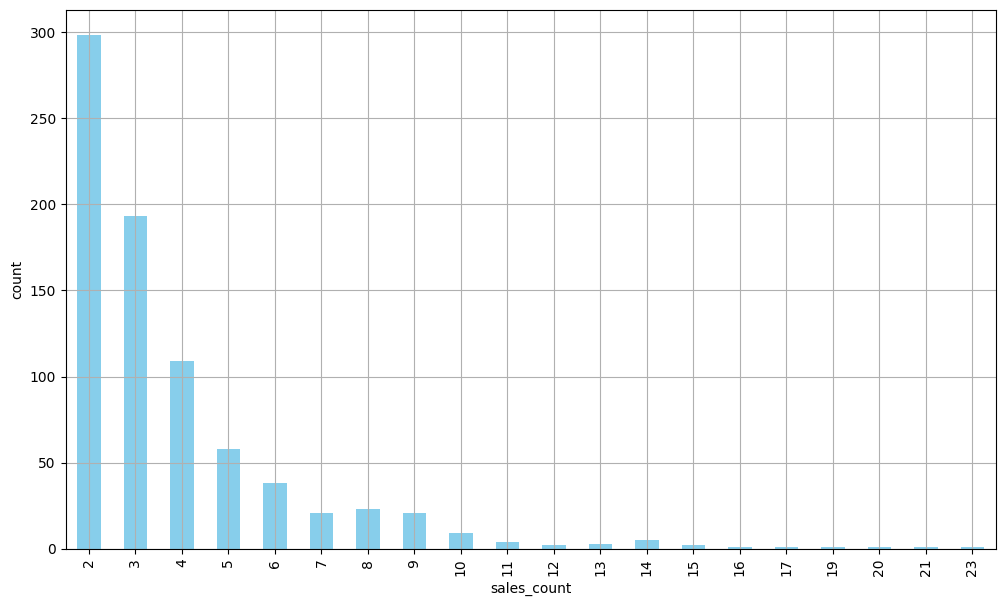

In [ ]:
# We filter on invoicedate_purchase_duration greater than 0
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] >= 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

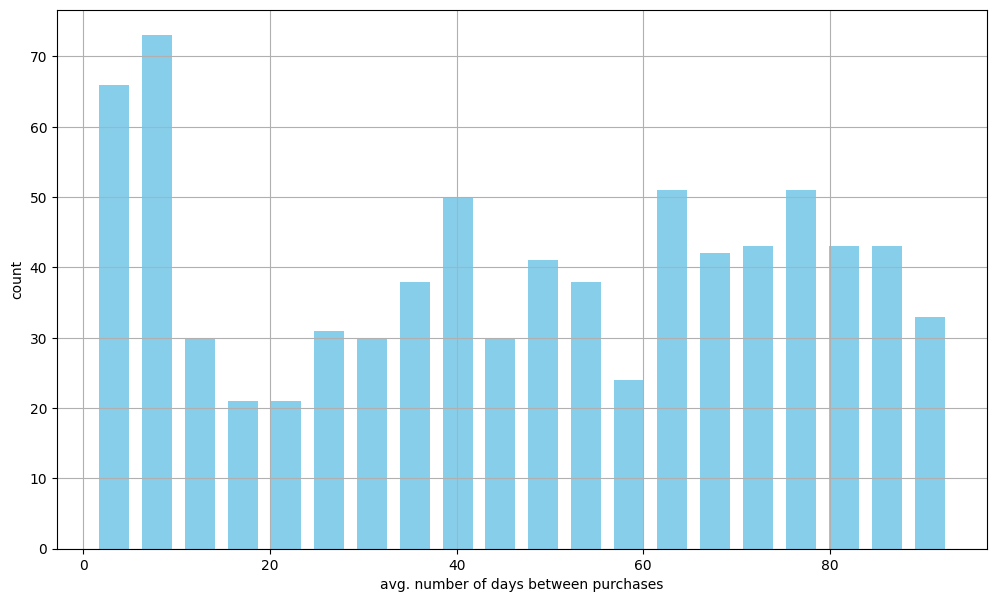

In [ ]:
# Now we create a distribution for the average times between sales
ax = summary_df['invoicedate_purchase_duration'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 4 month Customer Lifetime Value

In [ ]:
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                                
12346.0    541431     1103725480 2021-01-18 10:01:00
           C541433   -1103725480 2021-01-18 10:17:00
12347.0    537626       10178597 2020-12-07 14:57:00
           542237        6798077 2021-01-26 14:30:00
12348.0    539318       12767040 2020-12-16 19:09:00

In [ ]:
# Create summary statistics in 3 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '4M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2021-04-30,0,0.0,2
1,12347.0,2020-12-31,10178597,10178597.0,1
2,12347.0,2021-04-30,6798077,6798077.0,1
3,12348.0,2020-12-31,12767040,12767040.0,1
4,12348.0,2021-04-30,3252392,3252392.0,1


In [ ]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2021-04-30,0,0.0,2,M_1
1,12347.0,2020-12-31,10178597,10178597.0,1,M_2
2,12347.0,2021-04-30,6798077,6798077.0,1,M_1
3,12348.0,2020-12-31,12767040,12767040.0,1,M_2
4,12348.0,2021-04-30,3252392,3252392.0,1,M_1


In [ ]:
data_df['M'].unique()

array(['M_1', 'M_2'], dtype=object)

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)?

In [ ]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_count_M_2,sales_sum_M_2
CustomerID,,,
12347.0,10178597.0,1,10178597
12348.0,12767040.0,1,12767040
12370.0,13356343.0,2,26712686
12377.0,14321736.0,1,14321736
12383.0,8590296.0,1,8590296


In [ ]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_4M
0,12346.0,0
2,12347.0,6798077
4,12348.0,3252392
5,12350.0,4781920
6,12352.0,6304155


In [ ]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_count_M_2,sales_sum_M_2,CustomerID,CLV_4M
2.0,10178597.0,1,10178597,12347.0,6798077.0
4.0,12767040.0,1,12767040,12348.0,3252392.0
NaN,13356343.0,2,26712686,12370.0,0.0
16.0,14321736.0,1,14321736,12377.0,8960380.0
18.0,8590296.0,1,8590296,12383.0,9150713.0
...,...,...,...,...,...
2322.0,5229939.0,1,5229939,18245.0,5429424.0
NaN,-716430.0,1,-716430,18256.0,0.0
NaN,5381090.0,1,5381090,18259.0,0.0
2328.0,3299010.0,1,3299010,18260.0,7705126.0


In [ ]:
sample_set_df.shape

(948, 5)

# Using Linear Regression

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Get our y intercept
reg_fit.intercept_

-8810733.573160788

1. Intersep (intercept) Intersep, definisi secara metematis adalah suatu titik perpotongan antara suatu garis dengan sumbu Y pada diagram/sumbu kartesius saat nilai X = 0. Sedangkan definisi secara statistika adalah nilai rata-ratapada variabel Y apabila nilai pada variabel X bernilai 0.

In [ ]:
# Get our coefficents
reg_fit.coef_

array([2.61912727e+00, 7.27872867e+05, 3.33691596e-01, 8.73454860e+01])

In [ ]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,2.619127
1,sales_count_M_2,727872.866764
2,sales_sum_M_2,0.333692
3,CustomerID,87.345486


In [ ]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [ ]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.3307427183463376
5437450.083674217


In [ ]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.3307
Out-of-Sample R-Squared: -0.1311


In [ ]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 5437450.0837
Out-of-Sample MSE: 4727677.0681


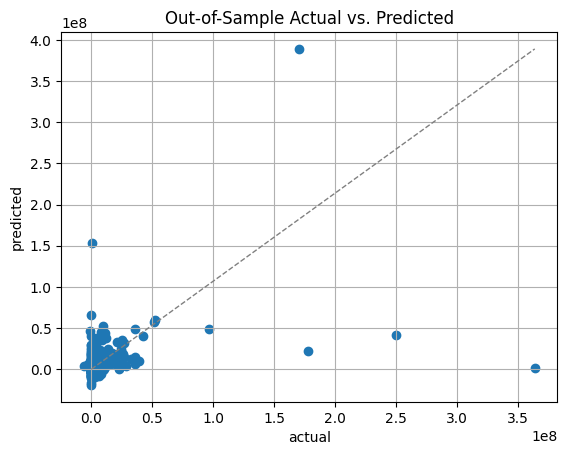

In [ ]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()